open terminal and install AssemblyLine with pip

In [1]:
!pip install DNA-AssemblyLine==0.0.4

Navigate to your local ~/site-packages directory to access AssemblyLine. Click on the DNA-AssemblyLine folder, and open the software directory.

In [2]:
! pip show DNA-AssemblyLine

Name: DNA-AssemblyLine
Version: 0.0.4
Summary: A package for automating DNA assembly with an Opentrons liquid handling robot
Home-page: https://github.com/PlantSynBioLab/opentrons
Author: John Bryant
Author-email: jbryant2@vt.edu
License: Apache License 2.0
Location: c:\users\opentrons\anaconda3\lib\site-packages
Requires: 
Required-by: 


In [4]:
! cd c:\users\opentrons\anaconda3\lib\site-packages

Run the pathswriter module in order to record your working directory and enable protocol setup scripts to navigate accurately. The pathswriter.py must be run in the AssemblyLine working directory so that the correct path is generated, and the paths.csv file is saved in the proper location.

In [8]:
! python -m DNA-AssemblyLine.pathswriter

Once paths.csv has been created, there are five options for protocols. 

The first option is a homology dependent assembly with 24 combined primers and templates.

In [ ]:
! python -m DNA-AssemblyLine.Cloning.Setup_seppcr_gradient_24

The second option is a homology dependent assembly with 96 combined primers and templates.

In [ ]:
! python -m DNA-AssemblyLine.Cloning.Setup_seppcr_gradient_96

The third option is a Golden Gate assembly with a destination plasmid with restriction sites. The destination plasmid is typically the backbone fragment and does not require PCR amplification. 

In [ ]:
! python -m DNA-AssemblyLine.Golden_Gate.Setup_digests_gradient

The fourth option is a Golden Gate assembly with 24 combined primers and templates.

In [ ]:
! python -m DNA-AssemblyLine.Golden_Gate.Setup_nodigests_seppcr_gradient_24

The fourth option is a Golden Gate assembly with 96 combined primers and templates.

In [ ]:
! python -m DNA-AssemblyLine.Golden_Gate.Setup_nodigests_seppcr_gradient_96

This vignette will go through the workflow of option five, which is a Golden Gate assembly with 96 possible primers and templates. After running the module, a tkinter file explorer window will pop up. This is for the user to navigate to the j5 combinatorial design folder saved on the machine.

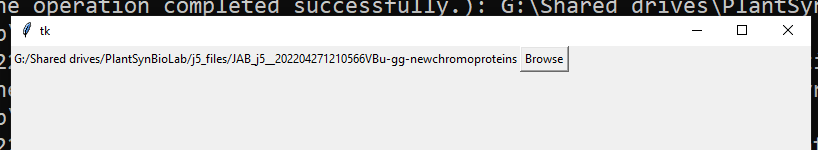

Once the design folder is selected, x out of browse window. An instructions text file window will automatically appear. This specifies where to place primers, templates, labware, etc. For the 96 well dilution script, it specifies the tube rack where the template belongs as well, since the deck has four 24 slot tuberacks for stock primers and templates. Close out this wind for now and open back up when ready to insert stock primers and templates.

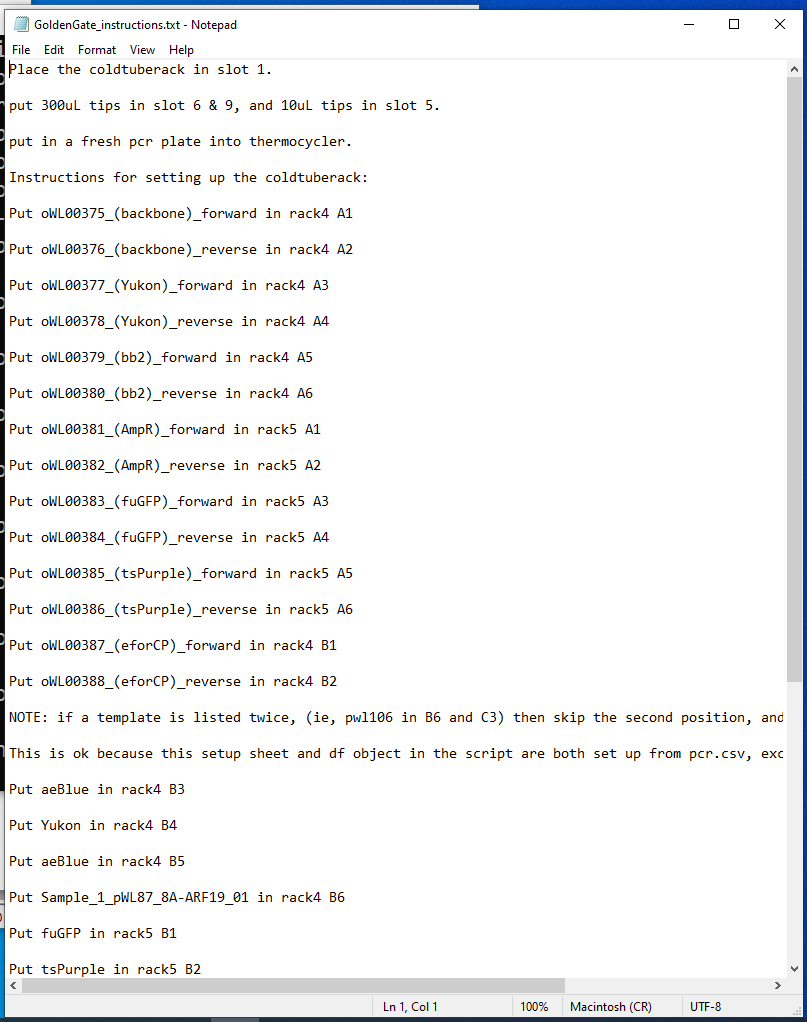

Next, another window will appear for specifying assembly parameters. All of the volume and concentration parameters are autofilled with values, however the user can change these as necessary. This window automatically reads in the templates that will be used for the assembly, so the user must find these in the freezer and input their concentrations in ng/uL at this time. Additionally, there are two slots for extra parameters in case the user wants to modify the source code. These can be left blank. Once the parameter are set, click confirm.

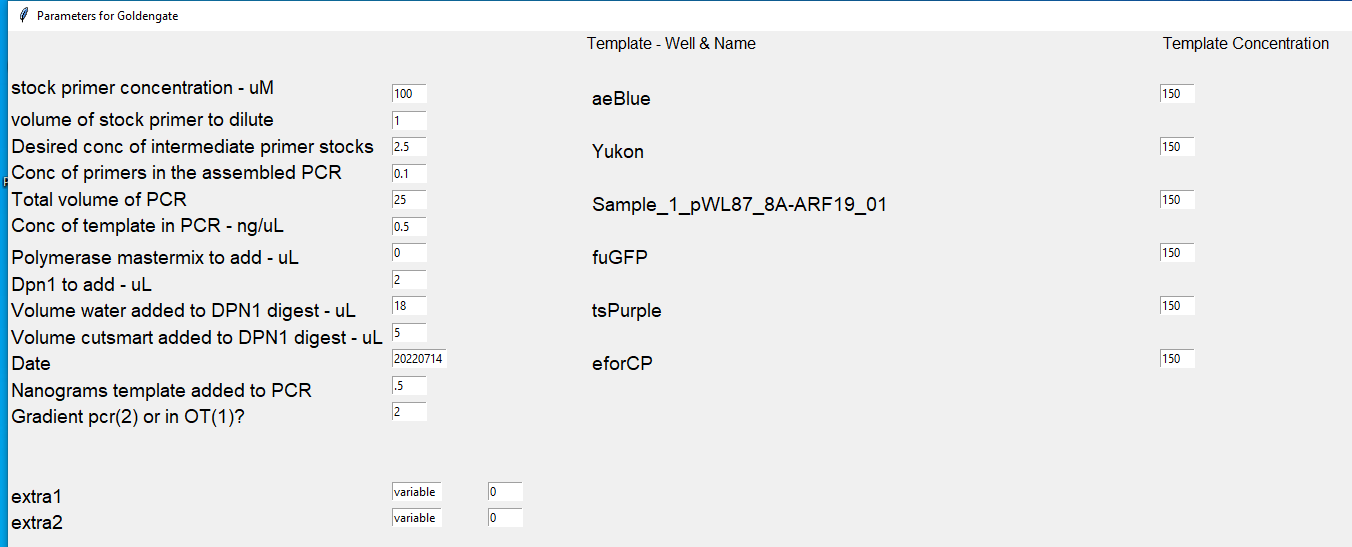

Next, a new window will appear where the user can choose which parts of the assembly run to perform. Often, it will be necessary to skip to later steps of the workflow or only perform the first parts. So this tool gives the user the ability to only run the parts of the script that they need without having to modify source code. Once the desired protocol steps are selected, click confirm. Then the window will need to be closed so that the script proceeds.

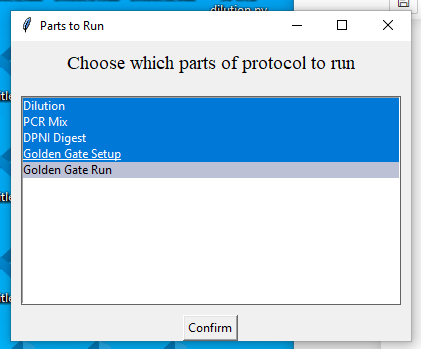

Next, a Tube placement text file will pop up to specify the tube configuration that needs to be used on the thermocycler. This is similar to the instructions text file. Both are saved in the new dated Golden Gate folder. 

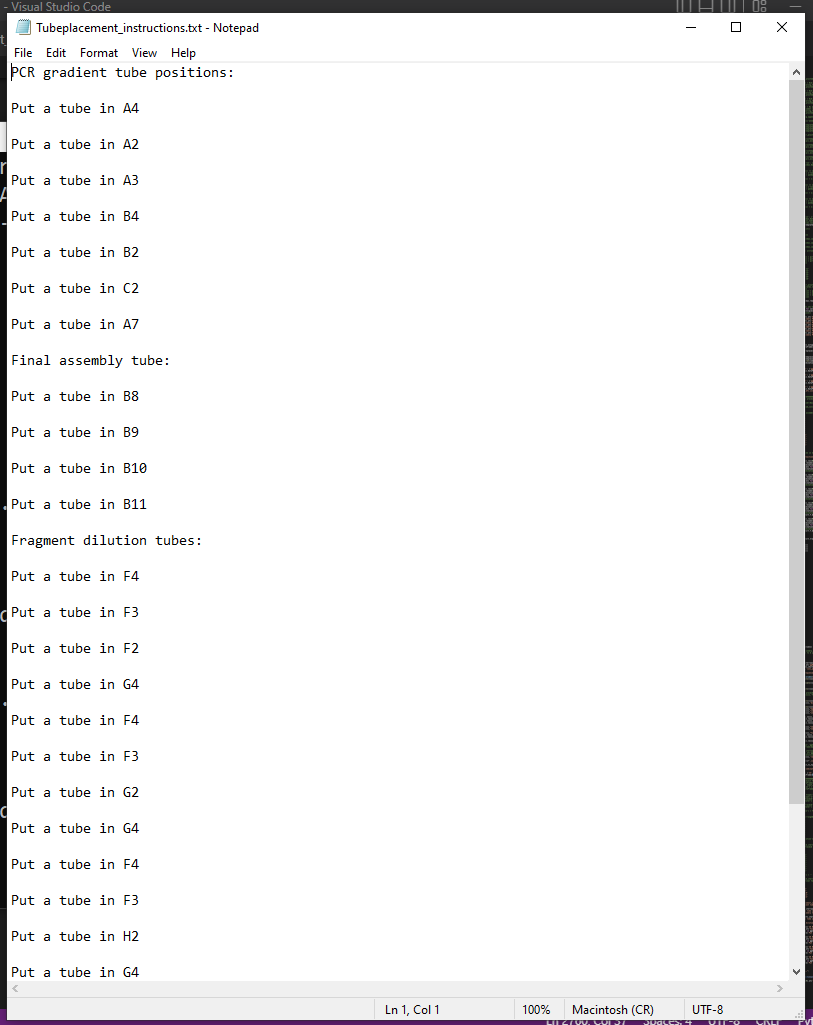

close the tube placement window.

run the file transfer script on bash to move CSV files onto the opentrons for the run. The paths on this script will need to be modified to match the AssemblyLine working directory (found using pip show DNA-AssemblyLine). This script is called Copy_Cloning.sh and is in the src directory of AssemblyLine.

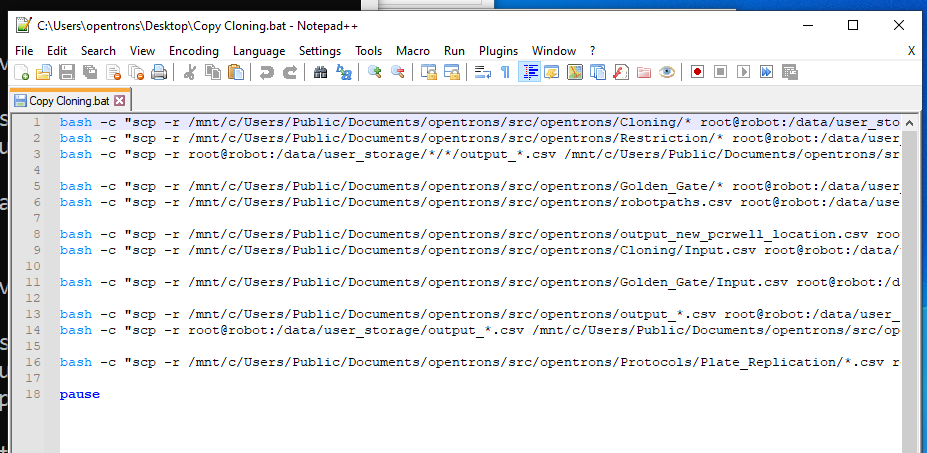

Turn on the opentrons robot and start the run app. Select the protocol tab on the left side of the window. Click on choose file. Navigate to the AssemblyLine working directory (found using pip show DNA-AssemblyLine). Navigate to the ~/site-packages/DNA-AssemblyLine/Golden_Gate/ directory and select the folder that you just generated. First click on the dilution_96.py. 

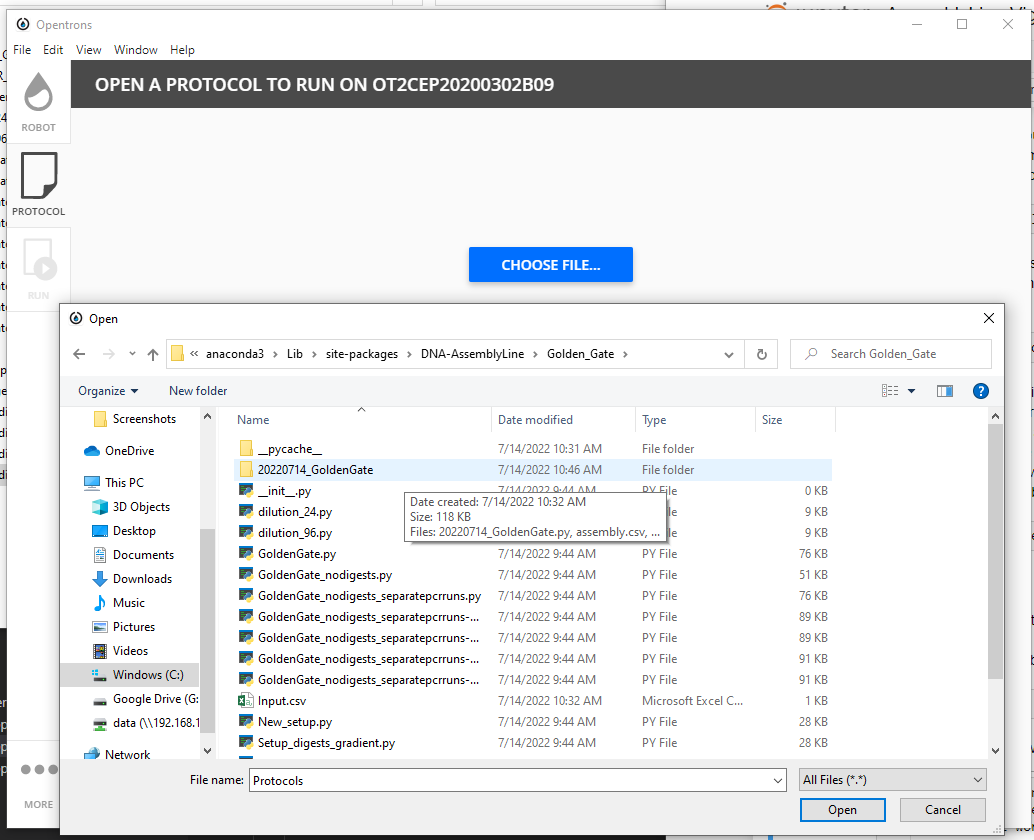

The opentrons app will then read the protocol script and show the deck setup for the initial primer and template dilution run. Instructruction slot designations for primer and template tubes and be found in the instruction text file. 

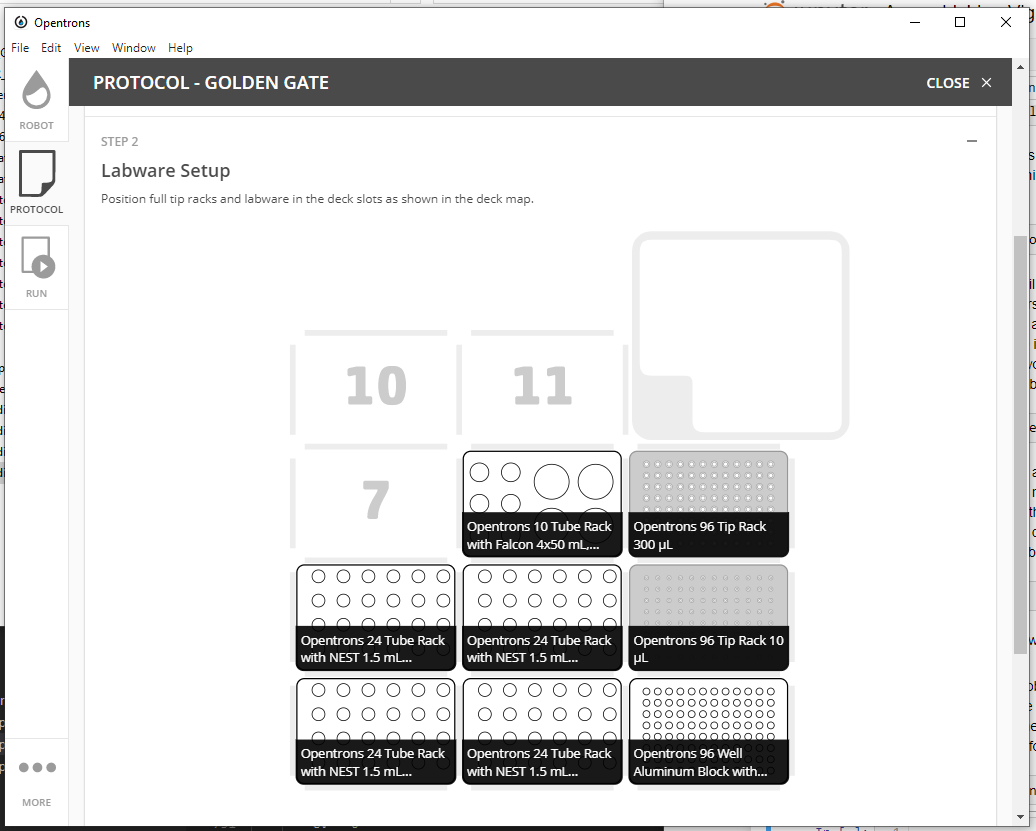

Review the protocol steps and run the dilution script. 

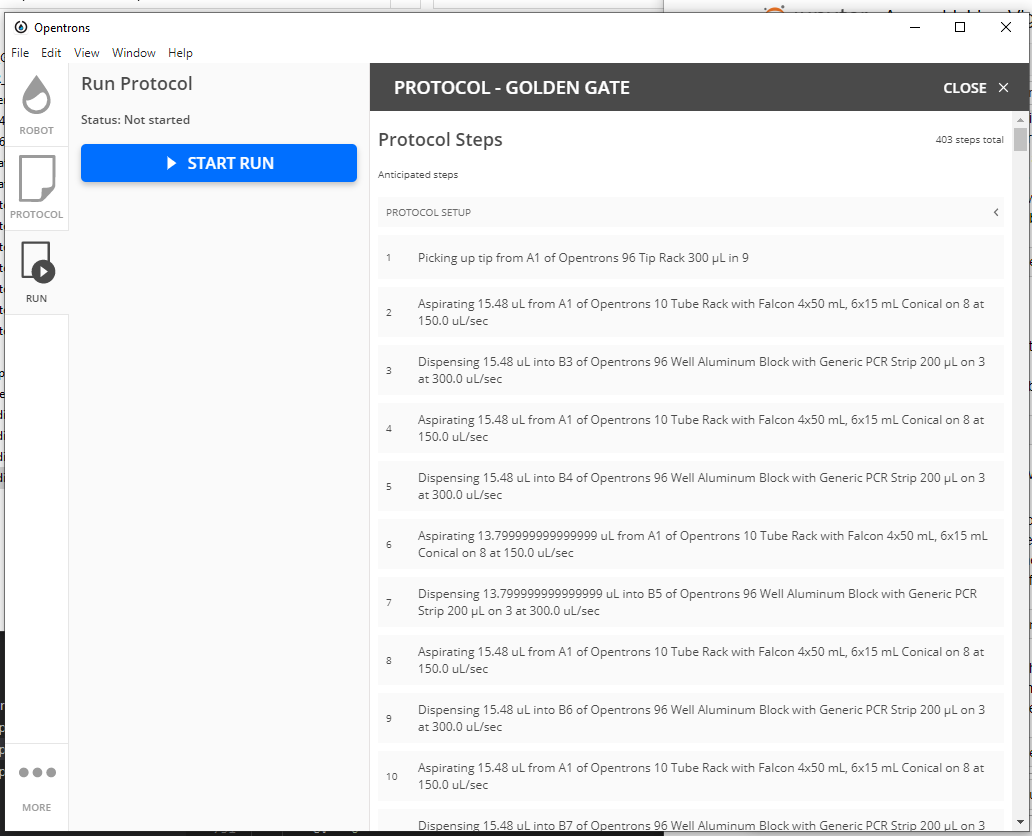

At the conclusion of this run, return to the protocol tab and close the dilution script. Restart the machine to avoid system freezing or crashing. Select choose file again and upload the date_GoldenGate.py script. Review protocol step and run. Opentrons app will then read the protocol script and show the deck setup for the initial primer and template dilution run. Instructruction slot designations for primer and template tubes and be found in the instruction text file.

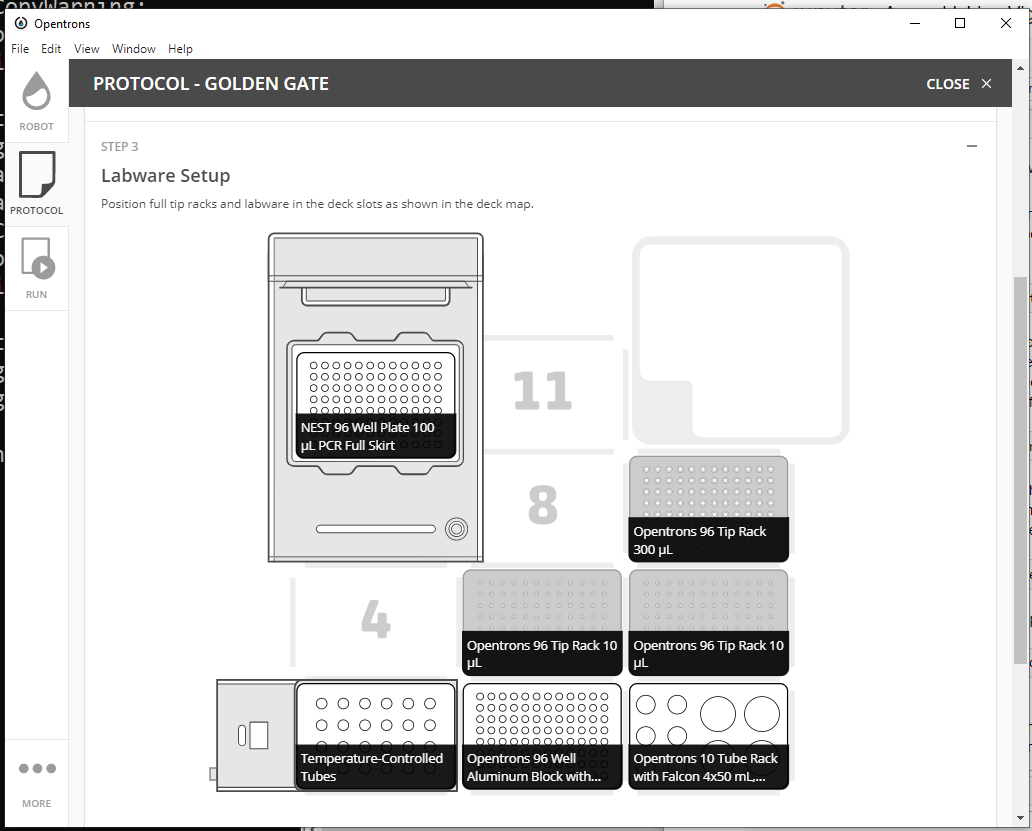

Follow prompts throughout the protocol run. For example, after PCRs are mixed, the protocol pauses and the user is prompted to move pcr strips to a gradient thermocycler. Optimized annealing and extension parameter are provided. 

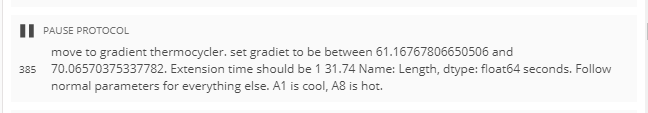

The user will also be prompted to refill tipracks, remove enzymes, etc. 

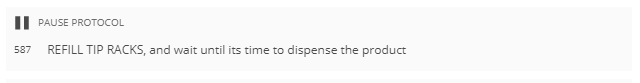

At the conclusion of the run retrieve assemblies for transformation. To power down, return all reagents to the freezer, shut down modules, and clean deck. 